BASIC SIMULATION ANALYSIS

In [1]:
# Import dependencies
import sys, pkgutil, os
import importlib

%load_ext autoreload
%autoreload 2

print(sys.executable)  # should point to .venv/bin/python

import cosmo_analysis
print("cosmo_analysis import OK; file:", cosmo_analysis.__file__)
print("submodules:", [m.name for m in pkgutil.iter_modules(cosmo_analysis.__path__)])

/sqfs/work/hp240141/z6b616/cosmo_analysis/.venv/bin/python
cosmo_analysis import OK; file: /sqfs2/cmc/1/work/hp240141/z6b616/cosmo_analysis/src/cosmo_analysis/__init__.py
submodules: ['core', 'io', 'plot']


In [2]:
def list_submodules_recursive(package, prefix=''):
    """
    Recursively discovers and lists all submodules for a given package.
    """
    # The prefix for iter_modules should be the package name + '.'
    module_prefix = package.__name__ + '.'
    
    # Find all direct submodules
    for module_info in pkgutil.iter_modules(package.__path__, prefix=module_prefix):
        # Print the found submodule
        print(prefix + module_info.name)
        
        # If the submodule is a package itself, recurse into it
        if module_info.ispkg:
            try:
                # Import the sub-package to access its __path__
                sub_package = importlib.import_module(module_info.name)
                # Recurse with increased indentation
                list_submodules_recursive(sub_package, prefix=prefix + "  ")
            except ImportError as e:
                print(f"{prefix}  -> Error importing {module_info.name}: {e}")

# Start the process from the top-level 'cosmo_analysis' package
print(f"Submodule tree for '{cosmo_analysis.__name__}':")
list_submodules_recursive(cosmo_analysis)

Submodule tree for 'cosmo_analysis':
cosmo_analysis.core
  cosmo_analysis.core.constants
  cosmo_analysis.core.fields
  cosmo_analysis.core.sim_objs
  cosmo_analysis.core.sim_prop
  cosmo_analysis.core.utils
cosmo_analysis.io
  cosmo_analysis.io.load
cosmo_analysis.plot
  cosmo_analysis.plot.plots


In [4]:
from cosmo_analysis.io.load import load 
from cosmo_analysis.plot.plots import ytProjPanel

# Load simulation and generate projection plots
sim_path = "/sqfs/work/hp240141/z6b616/sims/cosmoRun/final/cal1"
sim = load(name="cal1", path=sim_path, centerDefs=["3", "7"], allowedSnaps=[170])


Loading particle index: 100%|██████████| 57/57 [00:00<00:00, 2512.56it/s]


Working?
/sqfs/work/hp240141/z6b616/cosmo_analysis/outputlist_projection.txt
    Calculating face-on axis for snapshot at 0 limited by sphere of radius 32.58901093076777 kpc
    Calculated face-on axis [ 0.06260051 -0.71654654 -0.69472457] and edge-on axis [-0.99620546 -0.08703269  0.        ]


yt : [WARNING  ] 2025-09-20 02:57:44,061 Plotting ('PartType0', 'Density'): Both positive and negative values. Min = 0.0 cm*code_mass/code_length**3, Max = 8.269790743473104e+29 cm*code_mass/code_length**3.
yt : [WARNING  ] 2025-09-20 02:57:44,062 Switching to symlog colorbar scaling.
yt : [WARNING  ] 2025-09-20 02:59:01,300 Plotting ('PartType0', 'Density'): Both positive and negative values. Min = 0.0 cm*code_mass/code_length**3, Max = 8.283149282350186e+29 cm*code_mass/code_length**3.
yt : [WARNING  ] 2025-09-20 02:59:01,302 Switching to symlog colorbar scaling.


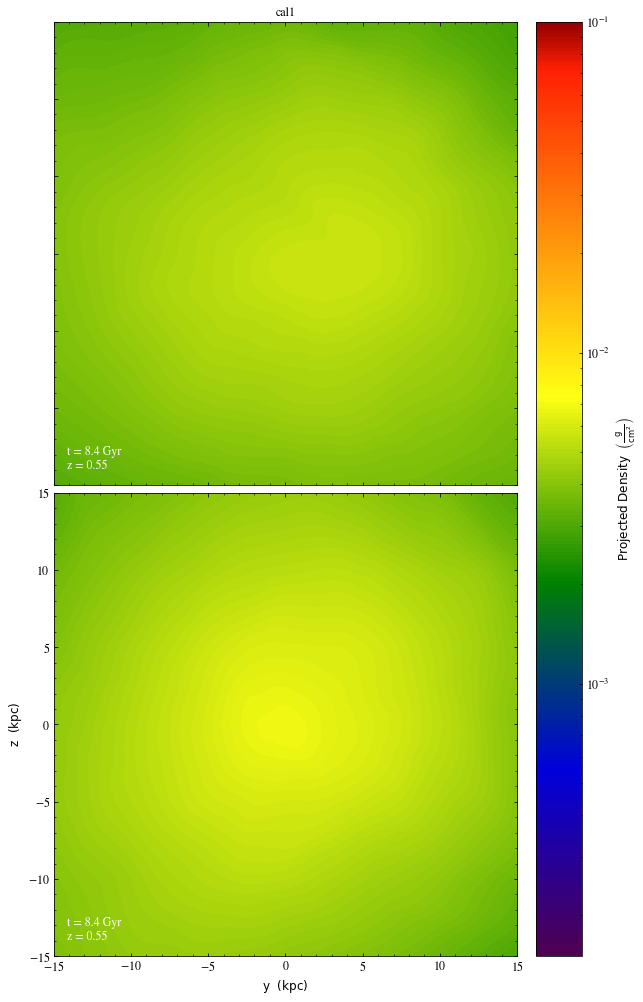

YTFieldNotFound: Could not find field ('PartType1', 'Density') in snapshot_170.
Did you mean:
	('PartType0', 'Density')
	('PartType0', 'density')
	('gas', 'density')

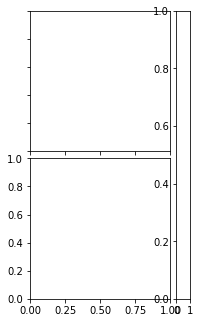

In [5]:
ytProjPanel(simArr=[sim], idxArr=[0], part="PartType0", message="Gas Density Projection", showFig=True, saveFig=False)
ytProjPanel(simArr=[sim], idxArr=[0], part="PartType1", message="Dark Matter Density Projection", showFig=True, saveFig=False)